In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [2]:
model = YOLO('yolo11n-obb.pt')
img_path = './data/images/led.jpg'

ship_class_index = [1]

In [3]:
results = model.predict(img_path)
speed = results[0].speed
total_time = speed['preprocess'] + speed['inference'] + speed['postprocess']

print(f"--- 검출 속도 (밀리초) ---")
print(f"전처리 (Preprocess): {speed['preprocess']:.1f} ms")
print(f"추론 (Inference):   {speed['inference']:.1f} ms")
print(f"후처리 (Postprocess): {speed['postprocess']:.1f} ms")
print(f"==============================")
print(f"총 검출 시간: {total_time:.1f} ms")
print(f"==============================")

results_ship = model.predict(img_path, classes=ship_class_index)
speed = results_ship[0].speed
total_time = speed['preprocess'] + speed['inference'] + speed['postprocess']

print(f"--- Only 'Ship' 검출 속도 (밀리초) ---")
print(f"전처리 (Preprocess): {speed['preprocess']:.1f} ms")
print(f"추론 (Inference):   {speed['inference']:.1f} ms")
print(f"후처리 (Postprocess): {speed['postprocess']:.1f} ms")
print(f"==============================")
print(f"총 검출 시간: {total_time:.1f} ms")
print(f"==============================")


image 1/1 /Users/cobot/Codes/yolo/ultralytics/data/images/led.jpg: 576x1024 76 ships, 581.4ms
Speed: 21.6ms preprocess, 581.4ms inference, 98.9ms postprocess per image at shape (1, 3, 576, 1024)
--- 검출 속도 (밀리초) ---
전처리 (Preprocess): 21.6 ms
추론 (Inference):   581.4 ms
후처리 (Postprocess): 98.9 ms
총 검출 시간: 702.0 ms

image 1/1 /Users/cobot/Codes/yolo/ultralytics/data/images/led.jpg: 576x1024 76 ships, 596.1ms
Speed: 21.2ms preprocess, 596.1ms inference, 54.9ms postprocess per image at shape (1, 3, 576, 1024)
--- Only 'Ship' 검출 속도 (밀리초) ---
전처리 (Preprocess): 21.2 ms
추론 (Inference):   596.1 ms
후처리 (Postprocess): 54.9 ms
총 검출 시간: 672.3 ms


In [4]:
img = results[0].plot()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_ship = results_ship[0].plot()
img_rgb_ship = cv2.cvtColor(img_ship, cv2.COLOR_BGR2RGB)

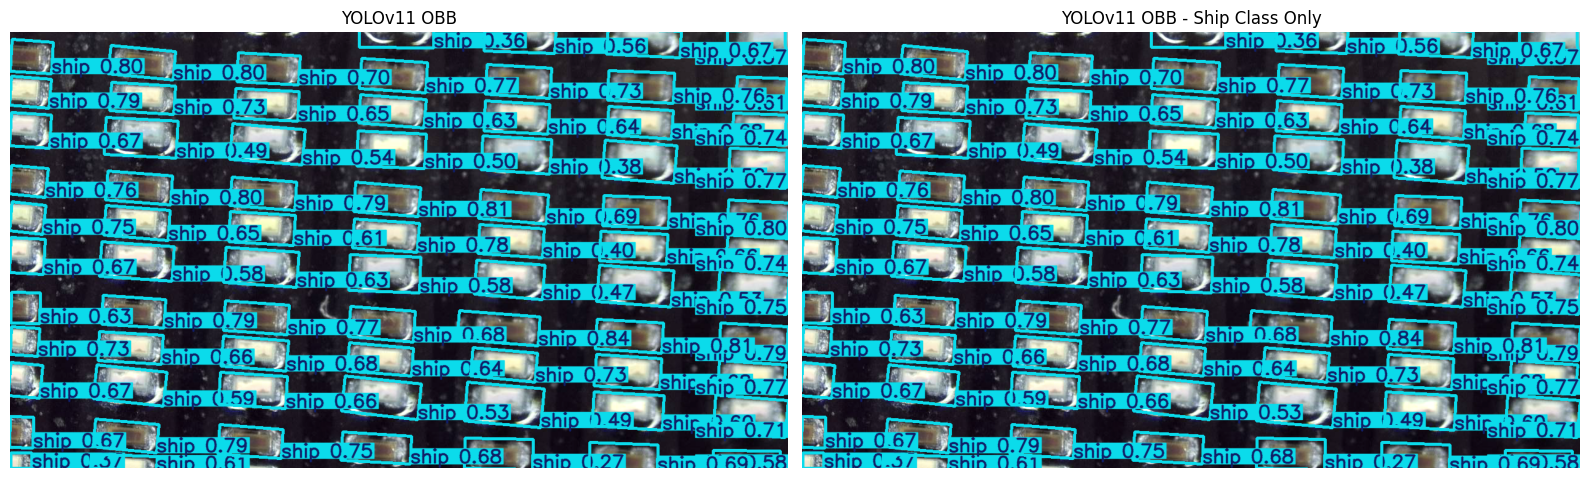

In [8]:
# 결과 이미지 출력
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img_rgb)
ax[0].set_title('YOLOv11 OBB')
ax[0].axis('off')

ax[1].imshow(img_rgb_ship)
ax[1].set_title('YOLOv11 OBB - Ship Class Only')
ax[1].axis('off')

plt.tight_layout()
plt.show()

image 1/1 /Users/cobot/Codes/yolo/ultralytics/data/images/led_tilted.jpeg: 576x1024 28 ships, 1106.2ms
Speed: 17.6ms preprocess, 1106.2ms inference, 16.4ms postprocess per image at shape (1, 3, 576, 1024)


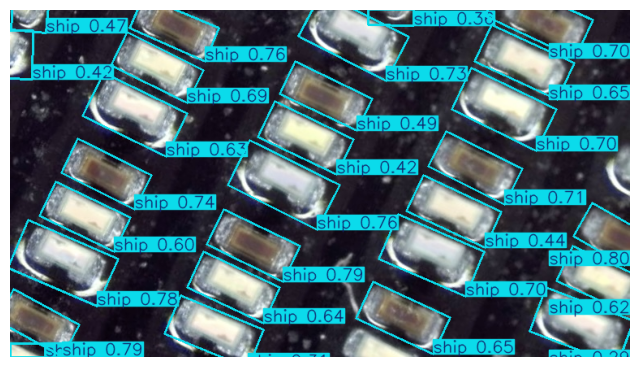

In [10]:
results = model.predict('./data/images/led_tilted.jpeg')

img = results[0].plot()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()